In [7]:
import tensorflow as tf
from tensorflow.keras.optimizers import SGD,Adam
import matplotlib.pyplot as plt
import numpy as np

In [8]:
# 载入数据集
mnist = tf.keras.datasets.mnist
# 载入训练集和测试集
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# 对训练集和测试集的数据进行归一化处理，有助于提升模型训练速度
x_train, x_test = x_train / 255.0, x_test / 255.0
# 把训练集和测试集的标签转为独热编码
y_train = tf.keras.utils.to_categorical(y_train,num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test,num_classes=10)

# 模型定义
model1 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(10, activation='softmax')
])
# 在定义一个一模一样的模型用于对比测试
model2 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(10, activation='softmax')
])

# 定义sgd优化器，学习率0.1
sgd = SGD(0.1)
# 定义Adam优化器，学习率0.001,Adam优化器学习率通常较低
adam = Adam(0.001)
# loss='mse'定义均方差代价函数
# metrics=['accuracy']模型在训练的过程中同时计算准确率
# model1用Adam优化器，model2用sgd优化器
model1.compile(optimizer=adam,
              loss='mse',
              metrics=['accuracy'])
model2.compile(optimizer=sgd,
              loss='mse',
              metrics=['accuracy'])

# 传入训练集数据和标签训练模型
# 周期大小为6（把所有训练集数据训练一次称为训练一个周期）
epochs = 6
# 批次大小为32（每次训练模型传入32个数据进行训练）
batch_size=32
# validation_data设置验证集数据
# 先训练model1
history1 = model1.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test,y_test))
# 再训练model2
history2 = model2.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/6
60000/60000 [==============================] - 2s 36us/sample - loss: 0.0196 - accuracy: 0.8819 - val_loss: 0.0131 - val_accuracy: 0.9175
Epoch 2/6
60000/60000 [==============================] - 2s 30us/sample - loss: 0.0129 - accuracy: 0.9182 - val_loss: 0.0118 - val_accuracy: 0.9241
Epoch 3/6
60000/60000 [==============================] - 2s 30us/sample - loss: 0.0119 - accuracy: 0.9247 - val_loss: 0.0113 - val_accuracy: 0.9268
Epoch 4/6
60000/60000 [==============================] - 2s 30us/sample - loss: 0.0113 - accuracy: 0.9283 - val_loss: 0.0110 - val_accuracy: 0.9291
Epoch 5/6
60000/60000 [==============================] - 2s 30us/sample - loss: 0.0110 - accuracy: 0.9309 - val_loss: 0.0110 - val_accuracy: 0.9291
Epoch 6/6
60000/60000 [==============================] - 2s 31us/sample - loss: 0.0107 - accuracy: 0.9327 - val_loss: 0.0109 - val_accuracy: 0.9316
Train on 60000 samples, validate on 10000 samples
Epoch 1/6
60

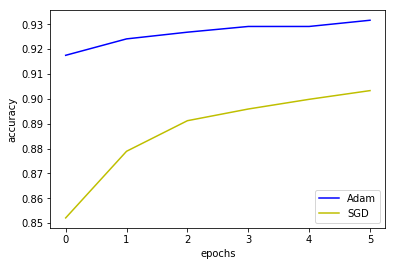

In [9]:
# 画出model1验证集准确率曲线图
plt.plot(np.arange(epochs),history1.history['val_accuracy'],c='b',label='Adam')
# 画出model2验证集准确率曲线图
plt.plot(np.arange(epochs),history2.history['val_accuracy'],c='y',label='SGD')
# 图例
plt.legend()
# x坐标描述
plt.xlabel('epochs')
# y坐标描述
plt.ylabel('accuracy')
# 显示图像
plt.show()